# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 580


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [12]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units=Metric&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url).json()
        
        city_weather = response["weather"]

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response["coord"]["lat"]
        city_lng =response["coord"]["lon"]
        city_max_temp =response["main"]["temp_max"]
        city_humidity =response["main"]["humidity"]
        city_clouds = response["clouds"]["all"]
        city_wind = response["wind"]["speed"]
        city_country =response["sys"]["country"]
        city_date = response["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | smithers
Processing Record 2 of Set 1 | hadibu
Processing Record 3 of Set 1 | san patricio
Processing Record 4 of Set 1 | sonsorol village
City not found. Skipping...
Processing Record 5 of Set 1 | kingston
Processing Record 6 of Set 1 | margaret river
Processing Record 7 of Set 1 | tutoia
Processing Record 8 of Set 1 | callao
Processing Record 9 of Set 1 | mysen
Processing Record 10 of Set 1 | ribeira grande
Processing Record 11 of Set 1 | mulayjah
Processing Record 12 of Set 1 | blackmans bay
Processing Record 13 of Set 1 | mount pearl
Processing Record 14 of Set 1 | lihue
Processing Record 15 of Set 1 | la maddalena
Processing Record 16 of Set 1 | usinsk
Processing Record 17 of Set 1 | grytviken
Processing Record 18 of Set 1 | east london
Processing Record 19 of Set 1 | newman
Processing Record 20 of Set 1 | keningau
Processing Record 21 of Set 1 | ushuaia
Processing Record 22 of Set 1 | mana


In [13]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          555
Lat           555
Lng           555
Max Temp      555
Humidity      555
Cloudiness    555
Wind Speed    555
Country       555
Date          555
dtype: int64

In [17]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,smithers,54.7804,-127.1743,-3.82,86,100,2.06,CA,1702684208
1,hadibu,12.6500,54.0333,24.61,65,95,7.50,YE,1702684208
2,san patricio,28.0170,-97.5169,21.41,91,97,3.05,US,1702684208
3,kingston,17.9970,-76.7936,27.53,84,75,4.12,JM,1702684208
4,margaret river,-33.9500,115.0667,19.35,44,91,3.85,AU,1702684208


In [18]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [19]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,smithers,54.7804,-127.1743,-3.82,86,100,2.06,CA,1702684208
1,hadibu,12.6500,54.0333,24.61,65,95,7.50,YE,1702684208
2,san patricio,28.0170,-97.5169,21.41,91,97,3.05,US,1702684208
3,kingston,17.9970,-76.7936,27.53,84,75,4.12,JM,1702684208
4,margaret river,-33.9500,115.0667,19.35,44,91,3.85,AU,1702684208


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

Bryson is colorblind, please don't take away points if that is the wrong color.


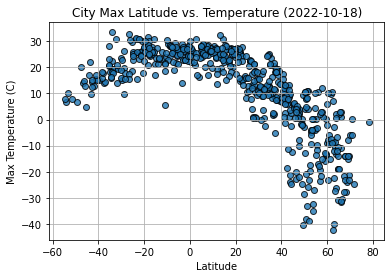

In [189]:
# Build scatter plot for latitude vs. temperature & Incorporate the other graph properties

plt.scatter(
    city_data_df['Lat'],
    city_data_df['Max Temp'],
    edgecolors='black',
    alpha=0.8
)

plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

plt.grid(True)
edgecolors='black'
alpha=0.5

# Save the figure
plt.savefig("output_data/Fig1.png")

print("Bryson is colorblind, please don't take away points if that is the wrong color.")
# Show plot
plt.show()

#### Latitude Vs. Humidity

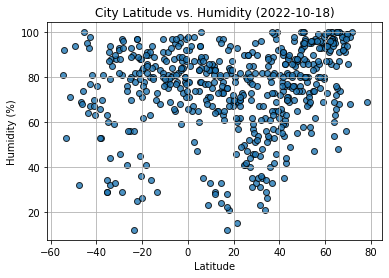

In [190]:
# Build the scatter plots for latitude vs. humidity, Incorporate the other graph properties

plt.scatter(
    city_data_df['Lat'],
    city_data_df['Humidity'],
    edgecolors='black',
    alpha=0.8
)

plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.grid(True)
edgecolors='black'
alpha=0.5

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

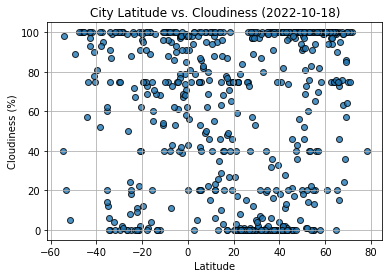

In [48]:
# Build the scatter plots for latitude vs. cloudiness, incorporate the other graph properties

plt.scatter(
    city_data_df['Lat'],
    city_data_df['Cloudiness'],
    edgecolors='black',
    alpha=0.8
)

plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.grid(True)
edgecolors='black'
alpha=0.5


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

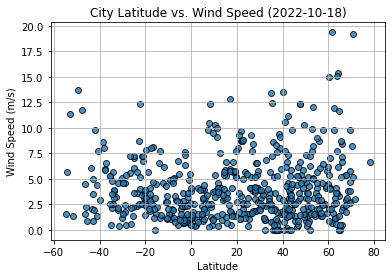

In [50]:
# Build the scatter plots for latitude vs. wind speed, Incorporate the other graph properties

plt.scatter(
    city_data_df['Lat'],
    city_data_df['Wind Speed'],
    edgecolors='black',
    alpha=0.8
)

plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

plt.grid(True)
edgecolors='black'
alpha=0.5

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [207]:
# Define a function to create Linear Regression plots
from scipy.stats import pearsonr


def linear_regression_plots(pandas_x_column, pandas_y_column, x_label, y_label):
    # Fit a first-degree polynomial (linear fit) to the data
    coefficients = np.polyfit(pandas_x_column, pandas_y_column, 1)

    # The coefficients are in the reverse order, so we reverse them
    slope, intercept = coefficients[::-1]

    # Create the regression line
    regression_line = np.polyval(coefficients, pandas_x_column)

    # Plot the scatter plot with a label
    plt.scatter(pandas_x_column, pandas_y_column)

    # Plot the linear regression line
    plt.plot(pandas_x_column, regression_line, color='red', label=f'Linear Regression Line: y = {slope:.2f}x + {intercept:.2f}')

    # Title, x-axis label, and y-axis label
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # Annotate the graph with the equation of the regression line
    equation = f'y = {slope:.2f}x + {intercept:.2f}'

    # Show the legend
    plt.legend()

    # Adjust layout to prevent overlapping
    plt.tight_layout()

    #Print the r-value 
    pearson_correlation = pandas_x_column.corr(pandas_y_column)
    print(f'The r-value is: {pearson_correlation}')

    # Show the plot
    plt.show()



In [208]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] > 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,smithers,54.7804,-127.1743,-3.82,86,100,2.06,CA,1702684208
1,hadibu,12.6500,54.0333,24.61,65,95,7.50,YE,1702684208
2,san patricio,28.0170,-97.5169,21.41,91,97,3.05,US,1702684208
3,kingston,17.9970,-76.7936,27.53,84,75,4.12,JM,1702684208
7,mysen,59.5535,11.3258,0.17,98,99,1.69,NO,1702684209


In [209]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,margaret river,-33.9500,115.0667,19.35,44,91,3.85,AU,1702684208
5,tutoia,-2.7619,-42.2744,27.31,84,39,6.34,BR,1702684209
6,callao,-12.0667,-77.1500,23.16,68,0,6.17,PE,1702684209
10,blackmans bay,-43.0167,147.3167,14.29,67,93,0.89,AU,1702684210
15,grytviken,-54.2811,-36.5092,6.55,92,98,5.66,GS,1702684210


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8124194483171373


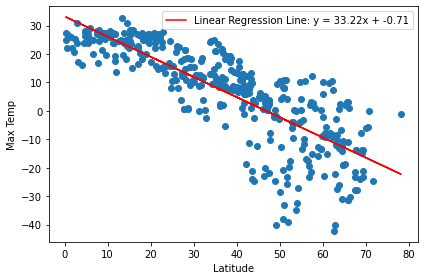

In [210]:
# Linear regression on Northern Hemisphere
linear_regression_plots(
    northern_hemi_df['Lat'],
    northern_hemi_df["Max Temp"],
    'Latitude',
    "Max Temp"
)

The r-value is: 0.6272317450350565


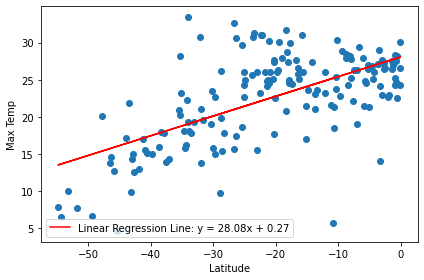

In [211]:
# Linear regression on Southern Hemisphere
linear_regression_plots(
    southern_hemi_df['Lat'],
    southern_hemi_df["Max Temp"],
    'Latitude',
    "Max Temp"
)

**Discussion about the linear relationship:** The closer cities get to the poles, which are latitude values of -90 and 90, the colder the temperature is. At the equator, a latitude value of 0, is the warmest are on earth. This is particularly true for cities in the Northern hemisphere, with a correlation value of -.81, indicating as the latitude increases (gets closer to the North Pole) the temperature decreases. The Southern Hemipshere correlation value is .62, indicating there are more outliers from the general pattern that cities closer to the south pole have a lower max temperature. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.31199772770323875


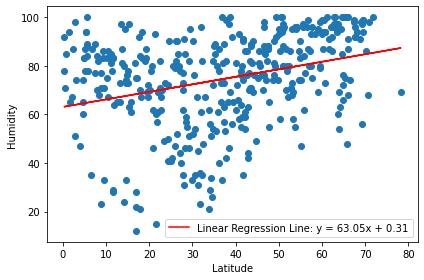

In [212]:
# Northern Hemisphere
linear_regression_plots(
    northern_hemi_df['Lat'],
    northern_hemi_df["Humidity"],
    'Latitude',
    "Humidity"
)

The r-value is: 0.22432439719317898


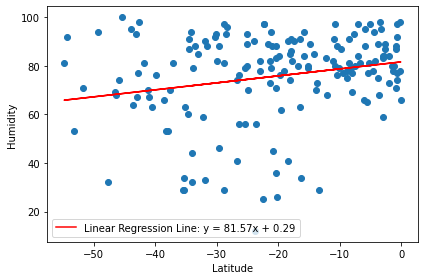

In [213]:
# Southern Hemisphere
linear_regression_plots(
    southern_hemi_df['Lat'],
    southern_hemi_df["Humidity"],
    'Latitude',
    "Humidity"
)

**Discussion about the linear relationship:** With correlation values of .31 and .22, there is no clear relationship between Humidty and Latitiude for our city data. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.1852538086410963


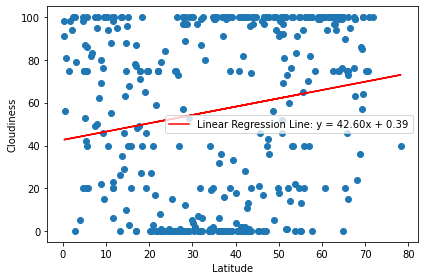

In [214]:
# Northern Hemisphere
linear_regression_plots(
    northern_hemi_df['Lat'],
    northern_hemi_df["Cloudiness"],
    'Latitude',
    "Cloudiness"
)

The r-value is: 0.06316427340770282


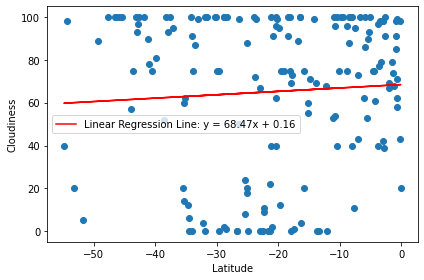

In [215]:
# Southern Hemisphere
linear_regression_plots(
    southern_hemi_df['Lat'],
    southern_hemi_df["Cloudiness"],
    'Latitude',
    "Cloudiness"
)

**Discussion about the linear relationship:** With correlation values of .18 and .06, there is no clear relationship between Cloudiness and Latitiude for our city data. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.12691954909108308


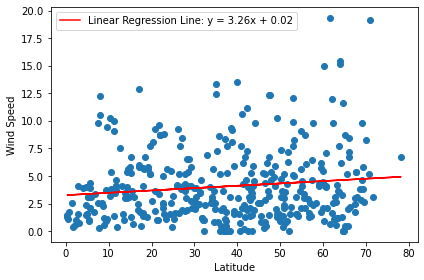

In [216]:
# Northern Hemisphere
linear_regression_plots(
    northern_hemi_df['Lat'],
    northern_hemi_df["Wind Speed"],
    'Latitude',
    "Wind Speed"
)

The r-value is: -0.2754964286628119


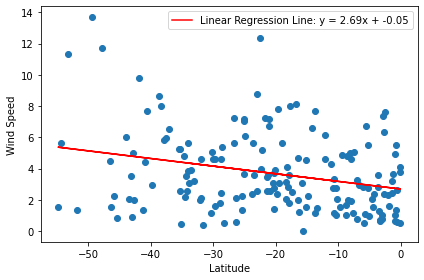

In [217]:
# Southern Hemisphere
linear_regression_plots(
    southern_hemi_df['Lat'],
    southern_hemi_df["Wind Speed"],
    'Latitude',
    "Wind Speed"
)

**Discussion about the linear relationship:** With correlation values of .12 and -.28, there is no clear relationship between Wind Speed and Latitiude for our city data. 